In [ ]:
# The code was removed by Watson Studio for sharing.

# Buying a house in Stockholm

_April 2020_

In [ ]:
#install Libraries
#libraries for scraping data from the web
!conda install -c anaconda beautifulsoup4 -y 
!conda install -c anaconda lxml -y 
!conda install -c conda-forge geocoder --yes
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes
print('Libraries imported.')

In [29]:
#import libraries
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

import bs4 as bs
from bs4 import BeautifulSoup

import requests 

import sys #getsize

import geocoder # import geocoder
import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim

import folium # map rendering library


## References

[1] https://en.wikipedia.org/wiki/Stockholm

[2] https://www.thenewbieguide.se/

[3] https://worldpopulationreview.com/world-cities/stockholm-population/

[4] https://tradingeconomics.com/sweden/interest-rate

[5] https://data.opendatasoft.com

[6] https://geo.nyu.edu

[7] https://www.maklarstatistik.se/omrade/riket/stockholms-lan/



## 1. Introduction

This work has been done as part of the course _IBM Data Science Professional Certificate_ from the platform [Coursera](https://www.coursera.org/professional-certificates/ibm-data-science). 

_All the data and assumptions are from the period before the Covid-19 outbreak. Making different assumption at this stage I believe being premature._



### 1.1 Background.
Stockholm is the capital of Sweden. Almost a million of people lives in the municipality, and approximately 2.4 million in the metropolitan area.
One of the beauties of the city is in its island: the city stretches on 14 island distributed at the intersection of the Lake Mälaren with the Baltic Sea.

Stockholm is the cultural, political, and economic center of Sweden. The city is multicultural, with many national and international corporate headquarters and startups, international students coming from all over the world to attend lectures in its prestigious universities.
It also hosts the annual Nobel Prize ceremonies and banquet at the Stockholm Concert Hall and Stockholm City Hall. 
Art is everywhere, including in the metro stations: the Stockholm metro has been called the longest art gallery in the world. Palaces, Castles, Museums and art galleries are just part of the beauty of the city can offer.
The city also has large parks and green areas, gardens, forests, beaches... a great place to enjoy outdoor life in the summer season.

_Sounds like a great place to relocate, isn't it?_

Stockholm's population is slowly but steadily increasing of more than 1% every year, making it harder and harder to find a place for living since not enough houses are built to keep up with the request (in 2018 around 14000 new dwelling were built, doubling the number of 2010).
This make rental highly competitive. For each ad, it is common that more than 100 people are messaging to get it and usually the places are rented out after just few days.
The research is strenuous, it can take up to several months to get a house to rent and often you have to move out in less than a year. 
If you are lucky, you can rent for as long as two years, facing after two year an increase in price of average 2% on the same type of rental, and it is not uncommon that at least 30 % of one's salary goes into the rent.



To stop living on the edge and finally settle, buying a house in Stockholm can be a solution.

Buying a house in Stockholm can be the best option for a variety of reasons:
- By the Swedish law, one needs to have a minimum 15% of the apartment value. It is possible to get mortgages quite easily if you have a fulltime job. In many cases, paying the mortgage is less expensive than paying a rent. Sweden has also one of the world’s lowest interest rate (-0.25%, 1019) 
- On average, the values of apartment in Stockholm is increasing. In the last 20 years, the increment has been around 60%.
- One does not need to move out suddenly or after a short period.

### 1.2 Where is the best place to buy a house in Stockholm?

What can be good parameters to decide where to buy a house in Stockholm?

- price and possible profit when you sell it,
- location,
- amenities,
- proximity to nature, beaches, ...
- schools,
- criminality rate, 
- initial investment one can do,
- size,
- proximity to work or other favorite places,
- proximity to public transportation,
- ...

There are many different and preferred parameters for each one of us and it is out of the scope of this work to evaluate all of them. However, this work want to be a first skimming to look further into one's dream house in Stockholm.
In this work, the analysis will include all the so-called Stockholm Län, including also the communes that are not Stockholm anymore but that are in close proximity to it.
In the next section, the parameters taken into consideration are introduced.




## 2. Data acquisition and cleaning.

In this work, Stockholm will be divided in several district plus all the area in the Stockholm Län will be considered. A list of the districts can be found on [Wikipedia](https://en.wikipedia.org/wiki/Category:Districts_of_Stockholm), however the division will be made differently, accordingly to the division in the prices database.
A list with the association district - longitude - latitude - postal code can be found on a different [database](https://data.opendatasoft.com/explore/dataset/geonames-postal-code%40public-us/table/?sort=place_name&q=Stockholm&refine.country_code=SE). This last database is ordered by post code, which are several for each area. To make it more useful to our scopes, i.e. access coordinates for each area, places with different post code but same name will be unified. 
For what concern Stockholm's neighborhood instead, a manual insertion of the coordinates is required since these data are missing.

The coordinates are essential to use the Foursquare API. It can be used to get the most common venues of a given area, including restaurants, parks, nightlife and some metro stations. The Second-level Administrative Divisions of Sweden can be found on the [Spatial Data Repository of NYU](https://geo.nyu.edu/catalog/stanford-vj304zk6062).
That is .json file has coordinates of the all district in Sweden so it needs to be reduced to only to Stockholm Län. Stockholm city can not be divided in departments on the map, since I could not find an adequate .json file.

The list of the prices of the houses per sqm and the comparison of the price in the last 12 months can be found for both the [Län](https://www.maklarstatistik.se/omrade/riket/stockholms-lan/#/bostadsratter/tabell) and for the inner [Stockholm](https://www.maklarstatistik.se/omrade/riket/stockholms-lan/stockholm/#/bostadsratter/tabell).

Finally, as last piece of the puzzle, the last indication will include if the neighborhood is safe or not. To be clear, Stockholm and most of the Län are very safe, but recently some are have been indicated as vulnerable, especially vulnerable and at risk. The data are taken from [Wikipedia](https://en.m.wikipedia.org/wiki/Vulnerable_area) concerning the evaluation of 2019. This data will be integrated in the previous data as boolean variables, where 1 indicate the presence of any of this area.

### 2.1 Importing the data from .cvs files.
The data of the database containing (1) the coordinates and the district is a .cvs file. In this section, the data will be imported and cleaned, as described above.
The data concerning the prices (2) are also .cvs file that can be imported. This file contains several data, but for our purposes, only the cost (Swedish Krona) per square meter is included, in the last three months and in the last year. An additional column to show the difference in price among the two will be added and the data printed.
At this point, it is necessary to unify the two data frames, so it will be necessary to match the areas considered in (1), with the ones considered in (2).
Let's start with the data from (1).

In [30]:
# The code was removed by Watson Studio for sharing.

In [31]:
df_postal.head()

,country code,postal code,place name,admin name1,admin code1,admin name2,admin code2,admin name3,admin code3,latitude,longitude,accuracy,coordinates
0,SE,186 44,Vallentuna,Stockholm,AB,Vallentuna,115.0,NaN,NaN,59.5344,18.0776,4.0,"59.5344, 18.0776"
1,SE,184 00,Akersberga,Stockholm,AB,Osteraker,117.0,NaN,NaN,59.4794,18.2997,4.0,"59.4794, 18.2997"
2,SE,184 28,Akersberga,Stockholm,AB,Osteraker,117.0,NaN,NaN,59.4794,18.2997,4.0,"59.4794, 18.2997"
3,SE,184 36,Akersberga,Stockholm,AB,Osteraker,117.0,NaN,NaN,59.4794,18.2997,4.0,"59.4794, 18.2997"
4,SE,184 63,Akersberga,Stockholm,AB,Osteraker,117.0,NaN,NaN,59.4794,18.2997,4.0,"59.4794, 18.2997"


In [32]:
df_postal.tail()

,country code,postal code,place name,admin name1,admin code1,admin name2,admin code2,admin name3,admin code3,latitude,longitude,accuracy,coordinates
3452,SE,196 34,Kungsangen,Stockholm,AB,NaN,NaN,NaN,NaN,59.4786,17.7483,4.0,"59.4786, 17.7483"
3453,SE,196 80,Kungsangen,Stockholm,AB,NaN,NaN,NaN,NaN,59.4786,17.7483,4.0,"59.4786, 17.7483"
3454,SE,197 32,Bro,Stockholm,AB,NaN,NaN,NaN,NaN,59.5167,17.6333,4.0,"59.5167, 17.6333"
3455,SE,190 40,Stockholm-arlanda,NaN,NaN,NaN,NaN,NaN,NaN,59.6352,17.9125,4.0,"59.6352, 17.9125"
3456,SE,190 45,Stockholm-Arlanda,NaN,NaN,NaN,NaN,NaN,NaN,59.6352,17.9125,4.0,"59.6352, 17.9125"


In the tables, the first 5 rows and the last 5 rows of the dataframe are presented.
From this dataframe, the interesting columns are the one temporarily called "admin name2", "latitude","longitude".
There are several refinement of the data necessary:
- if a cell has a "admin name2" not assigned, then the "admin name2" needs to be the same of the "place name";
- the non necessary columns can be removed;
- the three remaining columns need to be renamed as "Area", "Latitude", "Longitude";
- the cells in "Area" have to have only the first letter capitalized.
Let's print the last 5 rows again, to show that the corrections have been made.

In [33]:
#If a cell has a place name but not kommun 
df_postal.loc[df_postal['admin name2'].isnull(), 'admin name2'] =df_postal['place name']
df_postal.drop(['country code','postal code','admin name1','admin code1',  'admin code2', 'admin name3', 'admin code3','accuracy','coordinates'], axis=1, inplace=True)
df_postal.rename(columns={'admin name2':'Area','latitude':'Latitude','longitude':'Longitude'},inplace=True)
df_postal['Area'] = df_postal['Area'].str.capitalize() 

In [34]:
df_postal.drop(['place name'], axis=1, inplace=True)
df_postal.tail()

,Area,Latitude,Longitude
3452,Kungsangen,59.4786,17.7483
3453,Kungsangen,59.4786,17.7483
3454,Bro,59.5167,17.6333
3455,Stockholm-arlanda,59.6352,17.9125
3456,Stockholm-arlanda,59.6352,17.9125


At this point, the value in "Area" that are the same are grouped and the values of latitude and longitude are averaged. The limit of Latitude and Longitude is to 4 decimals as the value we had precedently.
Finally, the size of the dataframe and the whole dataframe are shown.

In [36]:
df_postal_gr= df_postal.groupby(['Area']).mean()
df_postal_gr= df_postal_gr.round({'Latitude': 4, 'Longitude': 4})
print('The size of this array is ', df_postal_gr.shape)
df_postal_gr.rename(index={'Stockholm': 'Central Stockholm'}, inplace=True)
df_postal_gr.head()

The size of this array is  (61, 2)


,Latitude,Longitude
Area,,
Akersberga,59.4794,18.2997
Alta,59.2667,18.1833
Alvsjo,59.2793,18.0111
Bandhagen,59.2968,18.0313
Botkyrka,59.2168,17.8268


Now the data from (2) can be imported as well and the first 5 rows of both dataframe are shown.

In [37]:
# @hidden cell
body = client_b869b1d93be342248ecc3b8a08a6c53a.get_object(Bucket='capstoneproject-donotdelete-pr-dvutwshvkmk6mk',Key='stockholm.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [38]:
df_sthlm = pd.read_csv(body)
df_sthlm.head()

,areas,Numberofsold,/Sq.m,Averagepricekr,Pricetrends(%),Numberofsold.1,/Sq.m.1,Averagepricekr.1,Pricetrends(%).1
0,Stockholm,4939,74690,4412000,2.4,22317,71827,4272000,9.5
1,Central Stockholm,2535,93787,5553000,3.0,11372,90158,5345000,8.4
2,Bromma,384,58832,3525000,5.0,1800,56586,3421000,7.3
3,Skarholmen,303,47576,3019000,5.9,1252,45212,2932000,6.3
4,Skarpnack,526,59718,3387000,3.2,2319,57861,3270000,8.4


In [39]:
body = client_b869b1d93be342248ecc3b8a08a6c53a.get_object(Bucket='capstoneproject-donotdelete-pr-dvutwshvkmk6mk',Key='Stockholmslan.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [40]:
df_sthlm_lan= pd.read_csv(body)
df_sthlm_lan.head()

,Omraden,Antalsalda,Kr/kvm,Medelpriskr,Prisutveckling(%),Antalsalda.1,Kr/kvm.1,Medelpriskr.1,Prisutveckling(%).1
0,Riket,24466,41164,2628000,2.4,112772,39888,2549000,8.6
1,Stockholmslan,9353,59473,3649000,1.8,42003,57518,3555000,8.9
2,Botkyrka,201,32151,2037000,2.1,898,31645,1974000,7.6
3,Danderyd,96,58848,3801000,7.3,368,57588,3790000,5.7
4,Ekero,23,39594,2831000,NaN,106,39275,2858000,NaN


From these data, the ones that are of interest are the one with the name of the areas, the one about the houses sold in the last 3 months, the price in SEK/sqm in the last 3 and 12 months and the average price of the houses sold.
The first thing to do is to remove the columns that are not needed and also the rows containing the summary of the data.
Next, the dataframes needs to be relabelled since for merging them, it is necessary that the columns name corresponds.
Finally, the data are appened together.
The resulting dataframe is shown.

In [41]:
cols = [1,4,5,7,8]
df_sthlm.drop(df_sthlm.columns[cols],axis=1,inplace=True)
df_sthlm_lan.drop([0,1],axis=0,inplace=True)
df_sthlm_lan.drop(df_sthlm_lan.columns[cols], axis=1,inplace=True)
df_sthlm.drop([0],axis=0,inplace=True)

In [42]:
#df_sthlm.drop(df_sthlm.columns[cols], axis=1,inplace=True)
df_sthlm.reset_index(drop=True,inplace=True)
df_sthlm_lan.reset_index(drop=True,inplace=True)

In [ ]:
#print(df_sthlm , '\n',  df_sthlm.shape)
#print('\n')
#print(df_sthlm_lan,  '\n',  df_sthlm_lan.shape )

In [43]:
#rename before merging
columns_labels =['Area','SEK/sqm 3 months','Av. price SEK','SEK/sqm 12 months']
df_sthlm.columns = columns_labels
df_sthlm_lan.columns = columns_labels

In [44]:
df_sthlm.head()

,Area,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months
0,Central Stockholm,93787,5553000,90158
1,Bromma,58832,3525000,56586
2,Skarholmen,47576,3019000,45212
3,Skarpnack,59718,3387000,57861
4,Essingen,78079,3838000,74692


In [45]:
df_sthlm_lan.head()

,Area,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months
0,Botkyrka,32151,2037000,31645
1,Danderyd,58848,3801000,57588
2,Ekero,39594,2831000,39275
3,Haninge,33670,2241000,32707
4,Huddinge,39733,2493000,38525


In [ ]:
df_st=df_sthlm.append(df_sthlm_lan, ignore_index=True)
#df_st = pd.concat(['df_sthlm','df_sthlm_lan'],ignore_index=True)

In [ ]:
df_st.head(50)

At this point, two new columns will be added:
    1. The change in price from 3 months to 12 months, as column "Growth %";
    2. A rough extimation of the average size of the sold houses in the area, as column "Av. Size".

The "Growth" column can give a rough idea if the house will gain or loose value in time.
The "Average Size" column can give an idea if the area has more families or single people living in an area. Also in this case it is a rough estimation, since nothing forbid a single person to live in a 100 sqm house!

In [48]:
##Add new columns including dfference in price per  sqm and avergage size of apartament
df_st['Growth %'] = ((df_st['SEK/sqm 3 months']- df_st['SEK/sqm 12 months'])/df_st['SEK/sqm 12 months'])*100
df_st['Av. Size'] = df_st['Av. price SEK']/df_st['SEK/sqm 3 months']

Finally, the dataframe looks like:

In [49]:
df_st.head(50)

,Area,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months,Growth %,Av. Size
0,Central Stockholm,93787,5553000,90158,4.025156,59.208632
1,Bromma,58832,3525000,56586,3.969180,59.916372
2,Skarholmen,47576,3019000,45212,5.228700,63.456365
3,Skarpnack,59718,3387000,57861,3.209416,56.716568
4,Essingen,78079,3838000,74692,4.534622,49.155343
5,Farsta,46196,2733000,45101,2.427884,59.160966
6,Hagersten,68557,3834000,65868,4.082407,55.924267
7,Hasselby,42283,2543000,41499,1.889202,60.142374
8,Kungsholmen,90285,5035000,87661,2.993349,55.767846
9,Kista,36075,2349000,34379,4.933244,65.114345


At this point, the dataframe containing the data with the prices and the one containing the dat of latitude and longitude need to be united in a single dataframe. The missing data of latitude and longitude will be added by using the _geolocator_ library (or manually), while the data that do not have a corresponding price/sqm will be dropped since they are already included in other areas.

In [54]:
#set indeces Area 
df_st.set_index('Area',inplace=True)
#merge
result = df_st.join(df_postal_gr, how='outer')

In [ ]:
print('The size of the final dataframe is', result.shape)
result.head()

In [56]:
result.dropna(subset=['Av. price SEK', 'SEK/sqm 3 months'], axis=0, inplace=True)

This is the final dataframe without latitude and longitude for the neighborhoods in Stockholm.

In [57]:
result.drop(index=["Stockholm"], inplace=True)
print('The size of the final dataframe is', result.shape)
result.head(41)

The size of the final dataframe is (40, 7)


,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months,Growth %,Av. Size,Latitude,Longitude
Area,,,,,,,
Botkyrka,32151.0,2037000.0,31645.0,1.598989,63.357283,59.2168,17.8268
Bro,27993.0,2130000.0,28177.0,-0.653015,76.090451,59.5167,17.6333
Bromma,58832.0,3525000.0,56586.0,3.969180,59.916372,59.3500,17.9167
Central Stockholm,93787.0,5553000.0,90158.0,4.025156,59.208632,59.3255,18.0127
Danderyd,58848.0,3801000.0,57588.0,2.187956,64.590131,59.3998,18.0442
Ekero,39594.0,2831000.0,39275.0,0.812222,71.500732,59.3119,17.7813
Enskede,59718.0,3387000.0,57861.0,3.209416,56.716568,59.2833,18.0667
Essingen,78079.0,3838000.0,74692.0,4.534622,49.155343,NaN,NaN
Farsta,46196.0,2733000.0,45101.0,2.427884,59.160966,59.2500,18.0833


Finally, the data of latitude and longitude are fetched by using the _geolocator_ library.

In [58]:
#let's see which areas have no latitude and longitude
# creating bool series True for NaN values 
bool_series = pd.isna(result["Latitude"]) 
# filtering data 
# displayind data only with Latitude = NaN 
print ("Value that do not have coordinates", result[bool_series].shape)
result[bool_series] 

Value that do not have coordinates (5, 7)


,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months,Growth %,Av. Size,Latitude,Longitude
Area,,,,,,,
Essingen,78079.0,3838000.0,74692.0,4.534622,49.155343,NaN,NaN
Kungsholmen,90285.0,5035000.0,87661.0,2.993349,55.767846,NaN,NaN
Ostermalm,100523.0,6542000.0,96148.0,4.550277,65.079634,NaN,NaN
Sodermalm,88299.0,4928000.0,85013.0,3.865291,55.810372,NaN,NaN
Vasastan-Norrmalm,100229.0,6196000.0,96628.0,3.726663,61.818436,NaN,NaN


Since only 5 values need coordinates, the easiest is to apply the _geoloctor_ on each value.

In [ ]:
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode("Stora Essingen, SE")
result.at['Essingen',"Latitude"]=location.latitude
result.at['Essingen',"Longitude"]= location.longitude
print("Data collected!")

In [ ]:
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode("Kungsholmen, SE")
result.at['Kungsholmen',"Latitude"]=location.latitude
result.at['Kungsholmen',"Longitude"]=location.longitude
print("Data collected!")

In [ ]:
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode("Ostermalm, SE")
result.at['Ostermalm',"Latitude"]=location.latitude
result.at['Ostermalm',"Longitude"]=location.longitude
print("Data collected!")

In [ ]:
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode("Sodermalm, SE")
result.at['Sodermalm',"Latitude"]=location.latitude
result.at['Sodermalm',"Longitude"]=location.longitude
print("Data collected!")

In [ ]:
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode("Vasastan, SE")
result.at['Vasastan-Norrmalm',"Latitude"]=location.latitude
result.at['Vasastan-Norrmalm',"Longitude"]=location.longitude
print("Data collected!")

Finally, this is the final database for this part. It contains all data concerning prices, and coordinates.

In [64]:
result.rename(columns={'Av. Size': 'Av. size sqm'}, inplace=True)
result['Av. size sqm']= np.round(result['Av. size sqm'], decimals=0)
#result.round({'Growth %': 2,'Av. size sqm': 0, 'Latitude': 3, 'Longitude':3})

In [65]:
result.head(41)

,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months,Growth %,Av. size sqm,Latitude,Longitude
Area,,,,,,,
Botkyrka,32151.0,2037000.0,31645.0,1.598989,63.0,59.216800,17.826800
Bro,27993.0,2130000.0,28177.0,-0.653015,76.0,59.516700,17.633300
Bromma,58832.0,3525000.0,56586.0,3.969180,60.0,59.350000,17.916700
Central Stockholm,93787.0,5553000.0,90158.0,4.025156,59.0,59.325500,18.012700
Danderyd,58848.0,3801000.0,57588.0,2.187956,65.0,59.399800,18.044200
Ekero,39594.0,2831000.0,39275.0,0.812222,72.0,59.311900,17.781300
Enskede,59718.0,3387000.0,57861.0,3.209416,57.0,59.283300,18.066700
Essingen,78079.0,3838000.0,74692.0,4.534622,49.0,59.321747,17.990692
Farsta,46196.0,2733000.0,45101.0,2.427884,59.0,59.250000,18.083300


### 2.2 Scraping Wikipedia to get the data of vulnerability.

For the data concerning the safety of a neighborhood, the data are scraped directly from the table in Wikipedia by using _BeautifulSoup_.
The first thing is to obtain the data and give them a shape that can be connected with the previous one.
In this phase also the special characters tipical of the Swedish alphabet are modified for analogy with the previous data.
The data will be connected with the previous data frame and the additional entries discarded.
In the next table, the data collected from Wikipedia for the year 2019 are set as booleans to simplify the analysis.

In [ ]:
url=requests.get('https://en.m.wikipedia.org/wiki/Vulnerable_area').text
#get the data using beautifulsoup from the link of wikipedia
soup=BeautifulSoup(url,'lxml')

#make a dataframe from the data collected from Wikipedia
table = soup.find_all('table')[1]
df_vulnerabilty = pd.read_html(str(table))[0]
df_vulnerabilty.head()

In [67]:
df_vulnerabilty.drop(index=[0], axis=0, inplace=True)
df_vulnerabilty.drop(columns=[2,3], axis=0, inplace=True)

In [68]:
df_vulnerabilty.dropna(subset=[4], axis=0, inplace=True)

In [69]:
df_vulnerabilty.drop(index=[64,65,66,67], axis=0, inplace=True)

In [70]:
df_vulnerabilty.rename(columns={0:"Area", 1: "District", 4: "2019"},inplace=True)

In [ ]:
df_vulnerabilty.head()

In [72]:
Feature = df_vulnerabilty[['Area','District','2019']]
Feature = pd.concat([Feature,pd.get_dummies(df_vulnerabilty['2019'])], axis=1)
Feature.drop(['2019'], axis = 1,inplace=True)
Feature.head(70)

,Area,District,E,R,V
1,Borås,Hässleholmen/Hulta,1,0,0
2,Borås,Norrby,1,0,0
3,Borlänge,Tjärna Ängar,0,1,0
4,Botkyrka,Alby,1,0,0
5,Botkyrka,Fittja,1,0,0
6,Botkyrka,Hallunda/Norsborg,1,0,0
7,Botkyrka,Storvreten,0,0,1
8,Eskilstuna,Fröslunda,0,0,1
9,Eskilstuna,Lagersberg,0,0,1
10,Eskilstuna,Skiftinge,0,0,1


"V", "R", "E" mean vulnerable, at risk and especially vulnerable respectively.
An area in the vulnerable category is characterised by a low socioeconomic status and where criminals have a negative impact on society and public institutions.
A risk area fulfills all criteria for a vulnerable area but do not qualify in all the criteria for an especially vulnerable area.
An especially vulnerable area is characterised by inhabitants having a potential threat from criminals in the area which has led to an overall disinclination to participate in judicial proceedings against criminals.

At this point, the value of Es, Vs, and Rs are summed for each area since we do not consider the single district inside the municipalities.
The data of Stockholm, which neighboorhood are considered separetly instead is copied in an other dataframe and modified. 

In [73]:
Feature_gr=Feature.groupby(["Area"]).sum()
Feature_gr.drop(index=("Stockholm"),inplace=True)

In [74]:
Feature_gr.head(40)

,E,R,V
Area,,,
Borlänge,0,1,0
Borås,2,0,0
Botkyrka,3,0,1
Eskilstuna,0,0,3
Göteborg,6,1,2
Halmstad,0,0,1
Haninge,0,0,2
Helsingborg,0,2,0
Huddinge,0,0,2


In [ ]:
Feature_STHL=Feature.copy(deep=True)
Feature_STHL= Feature_STHL.loc[44:50]
Feature_STHL.head(100)

In [76]:
Feature_STHL.drop(columns=['Area'],inplace=True)

In [ ]:
Feature_STHL.rename(columns={'District':'Area'},inplace=True)
Feature_STHL.head(10)

In [ ]:
Feature_STHL["Area"] = Feature_STHL["Area"].str.replace('ä','a')
Feature_STHL["Area"]= Feature_STHL["Area"].str.replace('å','a')
Feature_STHL["Area"] = Feature_STHL["Area"].str.replace('ö','o')
Feature_STHL["Area"] = Feature_STHL["Area"].str.replace('Ä','A')
Feature_STHL["Area"] = Feature_STHL["Area"].str.replace('Å','A')
Feature_STHL["Area"] = Feature_STHL["Area"].str.replace('Ö','O')

Feature_STHL.head(10)

In [79]:
Feature_STHL.at[45,'Area']="Hagsatra"
Feature_STHL.at[46,'Area']="Hasselby"
Feature_STHL.at[47,'Area']="Alvsjo"
Feature_STHL.at[49,'Area']="Rinkeby"
Feature_STHL.head(10)

,Area,E,R,V
44,Bredang,0,0,1
45,Hagsatra,0,0,1
46,Hasselby,0,0,1
47,Alvsjo,0,0,1
48,Ostberga,0,0,1
49,Rinkeby,1,0,0
50,Husby,1,0,0


The two dataframes are merged together again.

In [80]:
#merge the two databases again
Feature_gr.reset_index(inplace=True)
df_v=Feature_gr.append(Feature_STHL, ignore_index=True)

In [81]:
df_v["Area"] = df_v["Area"].str.replace('ä','a')
df_v["Area"]= df_v["Area"].str.replace('å','a')
df_v["Area"] = df_v["Area"].str.replace('ö','o')
df_v["Area"] = df_v["Area"].str.replace('Ä','A')
df_v["Area"] = df_v["Area"].str.replace('Å','A')
df_v["Area"]= df_v["Area"].str.replace('Ö','O')
df_v.at[20,'Area']="Bro"
df_v.head(60)

,Area,E,R,V
0,Borlange,0,1,0
1,Boras,2,0,0
2,Botkyrka,3,0,1
3,Eskilstuna,0,0,3
4,Goteborg,6,1,2
5,Halmstad,0,0,1
6,Haninge,0,0,2
7,Helsingborg,0,2,0
8,Huddinge,0,0,2
9,Jarfalla,0,0,2


Now, this dataframe needs to be merged wit the previous one. In the next table the final dataframe is shown.

In [82]:
df_v.set_index('Area',inplace=True)

In [83]:
Final=result.join(df_v, how='outer')

In [84]:
Final.dropna(subset=['Av. price SEK', 'SEK/sqm 3 months'], axis=0, inplace=True)

In [85]:
Final.reset_index(inplace=True)

In [86]:
Final=Final.fillna(0)

In [87]:
Final.head(60)

,Area,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months,Growth %,Av. size sqm,Latitude,Longitude,E,R,V
0,Botkyrka,32151.0,2037000.0,31645.0,1.598989,63.0,59.216800,17.826800,3.0,0.0,1.0
1,Bro,27993.0,2130000.0,28177.0,-0.653015,76.0,59.516700,17.633300,0.0,0.0,1.0
2,Bromma,58832.0,3525000.0,56586.0,3.969180,60.0,59.350000,17.916700,0.0,0.0,0.0
3,Central Stockholm,93787.0,5553000.0,90158.0,4.025156,59.0,59.325500,18.012700,0.0,0.0,0.0
4,Danderyd,58848.0,3801000.0,57588.0,2.187956,65.0,59.399800,18.044200,0.0,0.0,0.0
5,Ekero,39594.0,2831000.0,39275.0,0.812222,72.0,59.311900,17.781300,0.0,0.0,0.0
6,Enskede,59718.0,3387000.0,57861.0,3.209416,57.0,59.283300,18.066700,0.0,0.0,0.0
7,Essingen,78079.0,3838000.0,74692.0,4.534622,49.0,59.321747,17.990692,0.0,0.0,0.0
8,Farsta,46196.0,2733000.0,45101.0,2.427884,59.0,59.250000,18.083300,0.0,0.0,0.0
9,Hagersten,68557.0,3834000.0,65868.0,4.082407,56.0,59.305900,17.987200,0.0,0.0,0.0


### 2.3 Obtaining the data from Foursquare API.

The data of venues, schools can be taken from Foursquare by using an API. The idea is to collect the 10 most common venues for each neighborhood, excluding the hotels.
Thereafter, similar venues like Coffee shops and Cafés are going to be merged, as well as restaurants and places where to eat. This will make clearer the presence of other venues.
Additionally, an other query to collect only the restaurants and see for each neighborhood what kind of food is mostly available.
Finally, bus stops and metro stops for each neighborhood will be collected to see which areas are more no-car friendly.

In [88]:
# The code was removed by Watson Studio for sharing.

In [89]:
#Explore Neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
#Make the function run for all Neighbours in XXX
LIMIT=100

STHLM_venues = getNearbyVenues(names=Final['Area'],
                                   latitudes=Final['Latitude'],
                                   longitudes=Final['Longitude']
                                  )

In [91]:
print(STHLM_venues.shape)
STHLM_venues.head()

(1134, 7)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Botkyrka,59.2168,17.8268,Hågelbyparken,59.220898,17.830676,Park
1,Botkyrka,59.2168,17.8268,Café Anna Giertz,59.221357,17.828913,Café
2,Botkyrka,59.2168,17.8268,Sibylla i Tumba,59.215244,17.829147,Fast Food Restaurant
3,Botkyrka,59.2168,17.8268,Vretastugan,59.214718,17.817804,Scandinavian Restaurant
4,Bro,59.5167,17.6333,Goda Smaken,59.515648,17.642195,Pizza Place


In this table, an example of the data collected through the API is shown.

At this point it is possible to see for each area the number of venues found out of 100 requested for each location and the area 1 km around.

In [93]:
STHLM_venues.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
Botkyrka,4,4,4,4,4,4
Bro,4,4,4,4,4,4
Bromma,13,13,13,13,13,13
Central Stockholm,53,53,53,53,53,53
Danderyd,15,15,15,15,15,15
Ekero,4,4,4,4,4,4
Enskede,20,20,20,20,20,20
Essingen,29,29,29,29,29,29
Farsta,30,30,30,30,30,30


In [94]:
# one hot encoding
Sthlm_onehot = pd.get_dummies(STHLM_venues[['Venue Category']], prefix="", prefix_sep="")

# add Area column back to dataframe
Sthlm_onehot['Area'] = STHLM_venues['Area'] 

# move Area column to the first column
fixed_columns = [Sthlm_onehot.columns[-1]] + list(Sthlm_onehot.columns[:-1])
Sthlm_onehot = Sthlm_onehot[fixed_columns]

print(Sthlm_onehot.shape)
#Sthlm_onehot.head()
# group rows by Area and by taking the mean of the frequency of occurrence of each category
Sthlm_onehot.drop(['Hotel','Hostel','Tram Station','Bus Station','Train Station'], axis=1,inplace=True)
Sthlm_grouped = Sthlm_onehot.groupby('Area').mean().reset_index()
Sthlm_grouped
Sthlm_grouped = Sthlm_onehot.groupby('Area').mean().reset_index()

print(Sthlm_grouped.shape)
Sthlm_grouped

(1134, 186)
(37, 181)


,Area,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Thrift / Vintage Store,Toy / Game Store,Trail,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Botkyrka,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bro,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bromma,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Central Stockholm,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018868,0.00,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018868
4,Danderyd,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Ekero,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Enskede,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.00,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Essingen,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Farsta,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Hagersten,0.00,0.000000,0.000000,0.017241,0.000000,0.000000,0.017241,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000


In the dataframe above, for each venue, is represented the mean  of the frequency of occurrence of each category collected.

In [95]:
#Explore Neighborhoods
def getQuery(names, latitudes, longitudes, query, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            query)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Venue', 
                  'Venue Category']
    print("Done!")
    return(nearby_venues)

It is also possible to obtain the number of metros, tram, train and buses stops, for each area. Probably not all the stations are reported on Foursquare but it might anyway give an approximate estimation of the numbers. The approach is the same as before, the API square of Foursquare is used, butthis time there are specific quesries, i.e. research for the public transportation.

In [ ]:
QUERY='metro'
nearby_metro=getQuery(names=Final['Area'],
                                   latitudes=Final['Latitude'],
                                   longitudes=Final['Longitude'],
                                   query=QUERY                                
                                  )
QUERY='bus'
nearby_bus=getQuery(names=Final['Area'],
                                   latitudes=Final['Latitude'],
                                   longitudes=Final['Longitude'],
                                   query=QUERY                                
                                  )
QUERY='train'
nearby_train=getQuery(names=Final['Area'],
                                   latitudes=Final['Latitude'],
                                   longitudes=Final['Longitude'],
                                   query=QUERY                                
                                  )
QUERY='tram'
nearby_tram=getQuery(names=Final['Area'],
                                   latitudes=Final['Latitude'],
                                   longitudes=Final['Longitude'],
                                   query=QUERY                                
                                  )

In [107]:
GR_metro=nearby_metro.groupby('Area').count()
GR_metro.rename(columns={"Venue": "Metro stations"},inplace=True)
#GR_metro.head()

In [108]:
GR_bus=nearby_bus.groupby('Area').count()
GR_bus.rename(columns={"Venue": "Bus stops"},inplace=True)
#GR_bus.head()

In [109]:
GR_train=nearby_train.groupby('Area').count()
GR_train.rename(columns={"Venue": "Train stations"},inplace=True)
#GR_train.head()

In [110]:
GR_tram=nearby_tram.groupby('Area').count()
GR_tram.rename(columns={"Venue": "Tram stops"},inplace=True)
#GR_tram.head()

In [111]:
metrobus=GR_metro.merge(GR_bus , on='Area', how='right')
metrobus.drop(["Venue Category_x","Venue Category_y"],axis=1,inplace=True)
#metrobus.head(10)

In [112]:
metrobustram=metrobus.merge(GR_tram, on='Area', how='left')
metrobustram.drop(["Venue Category"],axis=1,inplace=True)
#metrobustram.head(10)

In [113]:
public_transportation=metrobustram.merge(GR_train , on='Area', how='left')
public_transportation=public_transportation.fillna(0)
public_transportation.drop(["Venue Category"],axis=1,inplace=True)
#public_transportation.head(10)

In [114]:
public_transportation.reset_index(inplace=True)

In [115]:
public_transportation.sort_values(['Area'],inplace=True)
public_transportation.reset_index(inplace=True, drop=True)
public_transportation.set_index(['Area'],inplace=True)
public_transportation.head(50)

,Metro stations,Bus stops,Tram stops,Train stations
Area,,,,
Botkyrka,0.0,1,0.0,0.0
Bromma,1.0,3,0.0,1.0
Central Stockholm,2.0,4,0.0,4.0
Danderyd,1.0,4,0.0,6.0
Enskede,3.0,3,0.0,1.0
Essingen,0.0,2,0.0,1.0
Farsta,2.0,1,0.0,0.0
Haninge,0.0,2,0.0,2.0
Huddinge,0.0,1,0.0,0.0


### 2.4 Summary

Finally all the data needed for this analysis are collected. 
The analysis will be done considering: 
- Prices and gorwth/decrease in value of the house,
- Size of a house,
- Amenities,
- Vulnerability of the area, 
- presence of public transportations.

## 3. Data Analysis.

As a first thing, let's plot a map of Stockholm Län and let's highlight the areas considered.

In [116]:
# create map of STHLM
address = 'Stockholm, SE'
#Coordinates of Stockholm for Google 59.3293° N, 18.0686° E

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_STHLM = folium.Map(location=[latitude, longitude], zoom_start=10)

In [117]:
# add markers to map
for lat, lng, area in zip(Final['Latitude'], Final['Longitude'],Final['Area']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.4,
        parse_html=False).add_to(map_STHLM)  
    
map_STHLM

### 3.1 How fare from the Stockholm?
If one observe the map, it is clearly visible that some areas are quite far from Stockholm. 
One person can decided a limitation on how far is ok to live and do not consider the area further than a certain radius. 
For example, it is possible to create three circles to identify different radius on the map. Let's draw a red circle at 50 km, a orange one at 30 km and a green one at 10 km.
From this map one can see that  2 areas are removed from the list from the red circle, 5 more are outside the orange circle and 15 from the green one. 

In [118]:
map_STHLM = folium.Map(location=[latitude, longitude], zoom_start=8)
for lat, lng, area in zip(Final['Latitude'], Final['Longitude'],Final['Area']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.4,
        parse_html=False).add_to(map_STHLM)  
    
folium.Circle([latitude, longitude],radius=50000,color='red', fill_color='red',fill_opacity=0.1).add_to(map_STHLM)    
folium.Circle([latitude, longitude],radius=30000,color='orange', fill_color='orange',fill_opacity=0.2).add_to(map_STHLM) 
folium.Circle([latitude, longitude],radius=10000,color='green', fill_color='green',fill_opacity=0.3).add_to(map_STHLM) 
map_STHLM

One evaluation that can be done is relate the prices per Sqm to the distance from the city and see if there is some relation.
First of all, one can calculate the distance using the coordinates and finally the distance vs. the prices per sqm can be compared.
To calculate the distance, it is necessary to have the latitude and longitude values in radians and then using the [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula).

In [120]:
#Final.drop(["index"],axis=1,inplace=True)

In [121]:
import math 

In [ ]:
R = 6373.0 #radius of the Earth
Final["Distance from City"]=0

for index, row in Final.iterrows():

    lat1 = math.radians(Final["Latitude"].iloc[index])
    lon1 = math.radians(Final["Longitude"].iloc[index])
    lat2 = math.radians(Final["Latitude"].iloc[3])
    lon2 = math.radians(Final["Longitude"].iloc[3])

    dlon = lon2 - lon1 #change in coordinates
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2 #Haversine formula

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    print("The ditance of ", Final["Area"].iloc[index]," is " ,distance)
    Final["Distance from City"].iloc[index]=distance

In [123]:
Final.rename(columns={"Distance from City": "Distance from City in km"},inplace=True)

In [124]:
Final.head(50)

,Area,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months,Growth %,Av. size sqm,Latitude,Longitude,E,R,V,Distance from City in km
0,Botkyrka,32151.0,2037000.0,31645.0,1.598989,63.0,59.216800,17.826800,3.0,0.0,1.0,16.056763
1,Bro,27993.0,2130000.0,28177.0,-0.653015,76.0,59.516700,17.633300,0.0,0.0,1.0,30.218892
2,Bromma,58832.0,3525000.0,56586.0,3.969180,60.0,59.350000,17.916700,0.0,0.0,0.0,6.089372
3,Central Stockholm,93787.0,5553000.0,90158.0,4.025156,59.0,59.325500,18.012700,0.0,0.0,0.0,0.000000
4,Danderyd,58848.0,3801000.0,57588.0,2.187956,65.0,59.399800,18.044200,0.0,0.0,0.0,8.455056
5,Ekero,39594.0,2831000.0,39275.0,0.812222,72.0,59.311900,17.781300,0.0,0.0,0.0,13.220253
6,Enskede,59718.0,3387000.0,57861.0,3.209416,57.0,59.283300,18.066700,0.0,0.0,0.0,5.606591
7,Essingen,78079.0,3838000.0,74692.0,4.534622,49.0,59.321747,17.990692,0.0,0.0,0.0,1.316866
8,Farsta,46196.0,2733000.0,45101.0,2.427884,59.0,59.250000,18.083300,0.0,0.0,0.0,9.306406
9,Hagersten,68557.0,3834000.0,65868.0,4.082407,56.0,59.305900,17.987200,0.0,0.0,0.0,2.616843


Text(0.5, 1.0, 'Distance from the city in km versus Price in SEK/Sqm for the last  3 months')

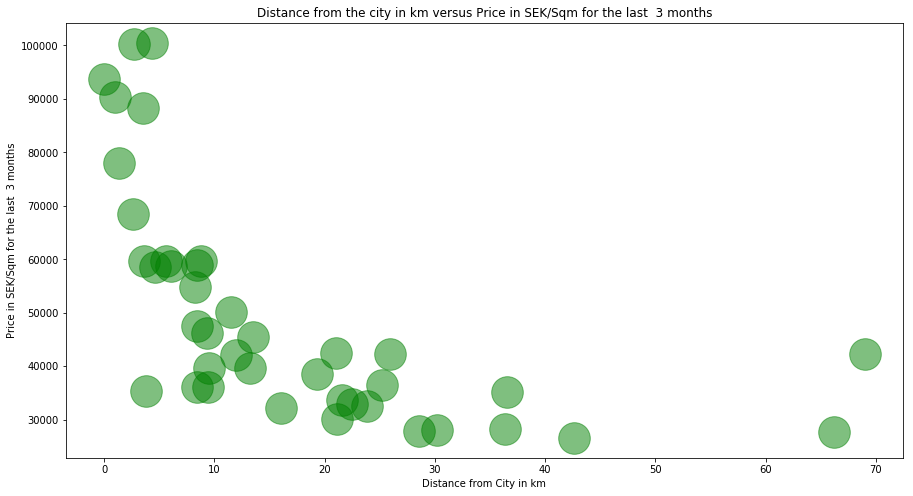

In [125]:
ax0 = Final.plot(kind='scatter',
                    x='Distance from City in km',
                    y='SEK/sqm 3 months',
                    figsize=(15, 8),
                    alpha=0.5,                  # transparency
                    color='green', # pass in weights 
                     s = 1000
                   )

ax0.set_ylabel('Price in SEK/Sqm for the last  3 months')
ax0.set_title('Distance from the city in km versus Price in SEK/Sqm for the last  3 months')

From the data presented in the figure above, it is quite clear that the prices are increasing the closest one is to the city.

Text(0.5, 1.0, 'Distance from the city in km versus Average dimension in Sqm of a house for the last  3 months')

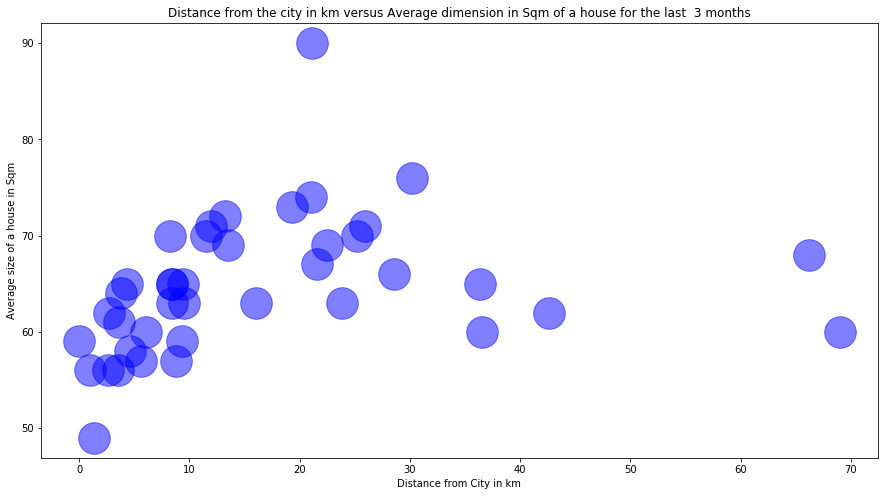

In [126]:
ax0 = Final.plot(kind='scatter',
                    x='Distance from City in km',
                    y='Av. size sqm',
                    figsize=(15, 8),
                    alpha=0.5,                  # transparency
                    color='blue', # pass in weights 
                     s = 1000
                   )

ax0.set_ylabel('Average size of a house in Sqm')
ax0.set_title('Distance from the city in km versus Average dimension in Sqm of a house for the last  3 months')

From the data presented in the figure above, it is quite clear that the apartaments are smaller the closest one is to the city and then stabilizes to around 70 Sqm.

In both graphs, an exception is given by the furthest area, Hasselby. Looking to other parameters might help to understand the reason for it. 

### 3.2 Prices today versus prices tomorrow
In this section, the change in price of the in the 3-months period and the 12-months period is evaluated. The clearer way to show it is using a bar plot.

In [ ]:
import matplotlib.pyplot as plt

df_Growth_gr=pd.DataFrame([Final['Area'],Final["SEK/sqm 3 months"],Final["SEK/sqm 12 months"],Final["Distance from City in km"]]).transpose()
df_Growth_gr.head()

In [ ]:
df_Growth_gr.sort_values(['Distance from City in km'],ascending=False,axis=0,inplace=True)
df_Growth_gr.head()

In [129]:
df_Growth_gr.set_index('Area',inplace=True)
df_Growth_gr.head()

,SEK/sqm 3 months,SEK/sqm 12 months,Distance from City in km
Area,,,
Hasselby,42283,41499,68.967
Norrtalje,27643,26806,66.158
Nynashamn,26565,25863,42.6213
Nykvarn,35162,32318,36.5466
Sigtuna,28207,29007,36.3354


In [130]:
df_Growth_gr.drop(['Distance from City in km'],axis=1,inplace=True)

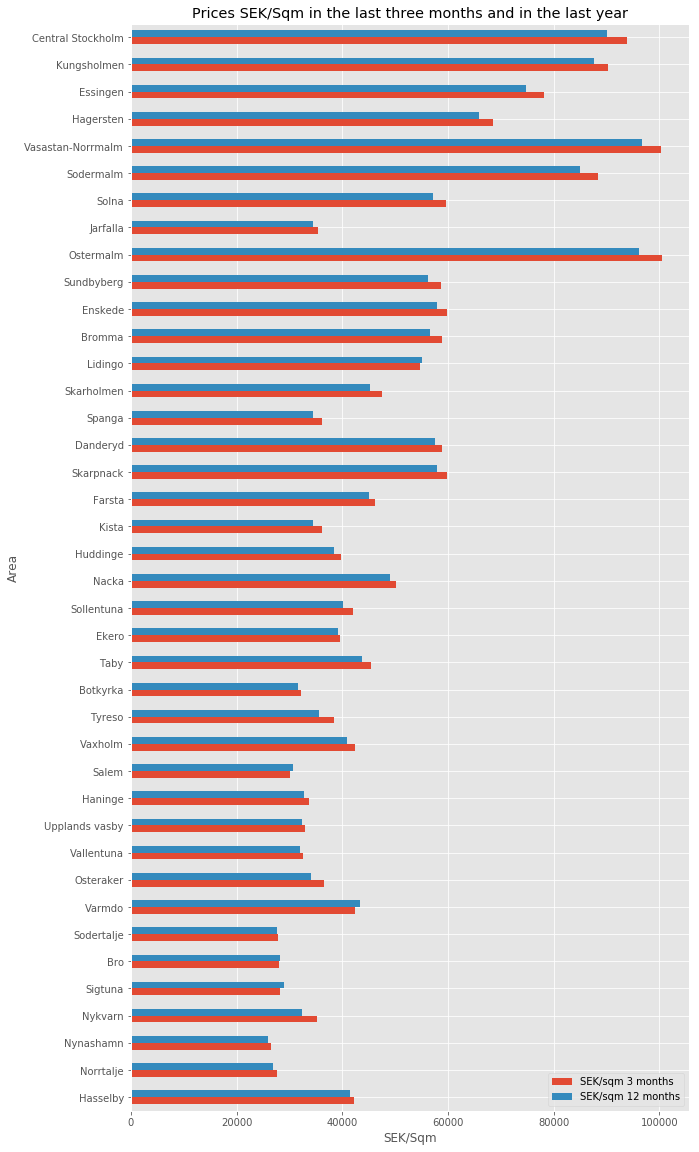

In [131]:
import matplotlib as mpl
mpl.style.use('ggplot') # optional: for ggplot-like style
df_Growth_gr.plot(kind='barh', figsize=(10, 20))

plt.xlabel("SEK/Sqm") # add to x-label to the plot
#plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Prices SEK/Sqm in the last three months and in the last year') # add title to the plot

plt.show()

From the previous picture, it is possible to notice that the prices increased all over the Stockholm Län. The areas are ordered by vicinity to the city center. In general, the further one goes from the city, the least is the growth of the prices.

Also, it is possible to group the different areas to see the distribution of prices to see what one needs to spend.

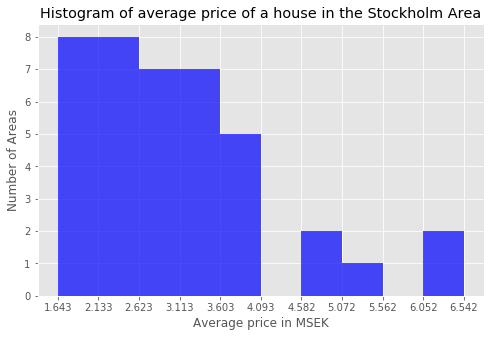

In [132]:
# np.histogram returns 2 values
new=(Final['Av. price SEK']/1e6)
count, bin_edges = np.histogram(new)

new.plot(kind='hist', figsize=(8, 5), xticks=bin_edges, color="blue",alpha=0.7)

plt.title('Histogram of average price of a house in the Stockholm Area') # add a title to the histogram
plt.ylabel('Number of Areas') # add y-label
plt.xlabel('Average price in MSEK') # add x-label

plt.show()

From the graph above, it is very clear that below 1.6 MSEK it is not possible to find anything. However, if someons's budget is around 4MSEK then one can look in many different areas.

### 3.3 Vulnerble areas, where one can find them?
A parameter to consider is also the safety of an area. In this section, the idea is to see where these areas are.

In [133]:
vuln_df=pd.DataFrame([Final['Area'],Final['Latitude'], Final['Longitude'],Final['Area'],Final["E"],Final["R"],Final["V"]]).transpose()

In [185]:
vuln_df['weighted sum']=vuln_df['V']*1+vuln_df['R']*3+vuln_df['E']*5+1

In [186]:
vuln_df["Col_vul"]=vuln_df['weighted sum'].apply(lambda x: 'orange' if x<=11 else "red")

vuln_df.loc[vuln_df['weighted sum']<=3,["Col_vul"]] = "yellow"
vuln_df.loc[vuln_df['weighted sum']<=1,["Col_vul"]] = "green"

print('There are {} uniques categories.'.format(len(vuln_df['weighted sum'].unique())))

There are 7 uniques categories.


In [ ]:
vuln_df.set_index(["Area"],inplace=True)

In [200]:
vuln_df.reset_index(inplace=True,drop=True)

In [203]:
vuln_df["Area"]=Final['Area']

In [209]:
vuln_df.reset_index(inplace=True)

In [ ]:
vuln_df.head(40)

In [211]:
color=vuln_df["Col_vul"]
index = [i  for i in range(40)]

In [213]:
# create map of STHLM
address = 'Stockholm, SE'
#Coordinates of Stockholm for Google 59.3293° N, 18.0686° E

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


map_STHLM = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to the map

for lat, lon, area, i in zip(vuln_df['Latitude'], vuln_df['Longitude'], vuln_df['Area'], index):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=color[i],
        fill=True,
        fill_color=color[i],
        fill_opacity=0.5,
        parse_html=False).add_to(map_STHLM)
       

folium.Circle([latitude, longitude],radius=50000,color='red', fill_color='red',fill_opacity=0.1).add_to(map_STHLM)    
folium.Circle([latitude, longitude],radius=30000,color='orange', fill_color='orange',fill_opacity=0.2).add_to(map_STHLM) 
folium.Circle([latitude, longitude],radius=10000,color='green', fill_color='green',fill_opacity=0.3).add_to(map_STHLM) 
map_STHLM

### 3.4 K-mean to see affinities among areas excluding the prices. Can one live in a cheaper area with the same amenities and transportations?

In this section, for each area the 10 most common amenities will be found. Then this dataframe will be merged with the one including public transportations and vulerabile areas.
Finally, on this data set a K-cluster will be runned to see any pattern.

In [216]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In the following table, the 10 most common venues for each area are shown.

In [233]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
area_venues_sorted = pd.DataFrame(columns=columns)
area_venues_sorted['Area'] = Sthlm_grouped['Area']

for ind in np.arange(Sthlm_grouped.shape[0]):
    area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Sthlm_grouped.iloc[ind, :], num_top_venues)
area_venues_sorted.set_index(['Area'],inplace=True)
area_venues_sorted.head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Area,,,,,,,,,,
Botkyrka,Scandinavian Restaurant,Café,Fast Food Restaurant,Park,Yoga Studio,Falafel Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop
Bro,Grocery Store,Pizza Place,Gym Pool,Yoga Studio,Food Truck,Food Court,Food & Drink Shop,Flea Market,Fish Market,Fast Food Restaurant
Bromma,Pizza Place,Food & Drink Shop,Playground,Convenience Store,Plaza,Bistro,Lake,Metro Station,Thai Restaurant,Soccer Field
Central Stockholm,Scandinavian Restaurant,Beach,Café,Park,Grocery Store,Restaurant,Harbor / Marina,Pizza Place,Thai Restaurant,Office
Danderyd,Gym / Fitness Center,Italian Restaurant,Sushi Restaurant,Liquor Store,Pool,Convenience Store,Restaurant,Salon / Barbershop,Bus Stop,Supermarket


In [ ]:
vuln_k=pd.DataFrame([Final['Area'],Final["E"],Final["R"],Final["V"]]).transpose()
vuln_k.set_index(vuln_k['Area'],inplace=True,drop=True)
vuln_k.head()

In [ ]:
vuln_k.drop(['Area'],axis=1,inplace=True)
vuln_k.head()

In [ ]:
public_transportation.head()

In [239]:
Sthlm_grouped.set_index(['Area'],inplace=True,drop=True)
k_cluster1=public_transportation.join(vuln_k, how='outer')
k_cluster_sthlm=k_cluster1.join(Sthlm_grouped,how="outer")

In [ ]:
k_cluster_sthlm=k_cluster_sthlm.fillna(0)
k_cluster_sthlm.head()

At his point, we apply the k-mean algorithm to see similarities in within the areas.
The table here includes all the data we had until now, after merging the datafram used for k-mean and the one including the prices.

In [ ]:
# set number of clusters
kclusters = 5


#sthlm_grouped_clustering = Sthlm_grouped.drop('Neighborhood', 1)

# run k-means clustering
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(k_cluster_sthlm)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
k_cluster_sthlm.head(50)

In [ ]:
# add clustering labels
k_cluster_sthlm.insert(0, 'Cluster Labels', kmeans.labels_)

In [ ]:
Final.set_index(['Area'],inplace=True)
Final.drop(["E","R","V"],axis=1, inplace=True)
Final.head()

In [ ]:
part_merged= Final.join(k_cluster_sthlm["Cluster Labels"],how='outer')


In [296]:
all_data_merged=part_merged.join(area_venues_sorted,how='outer')
all_data_merged.head()

,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months,Growth %,Av. size sqm,Latitude,Longitude,Distance from City in km,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Area,,,,,,,,,,,,,,,,,,,
Botkyrka,32151.0,2037000.0,31645.0,1.598989,63.0,59.2168,17.8268,16.056763,1,Scandinavian Restaurant,Café,Fast Food Restaurant,Park,Yoga Studio,Falafel Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop
Bro,27993.0,2130000.0,28177.0,-0.653015,76.0,59.5167,17.6333,30.218892,1,Grocery Store,Pizza Place,Gym Pool,Yoga Studio,Food Truck,Food Court,Food & Drink Shop,Flea Market,Fish Market,Fast Food Restaurant
Bromma,58832.0,3525000.0,56586.0,3.969180,60.0,59.3500,17.9167,6.089372,0,Pizza Place,Food & Drink Shop,Playground,Convenience Store,Plaza,Bistro,Lake,Metro Station,Thai Restaurant,Soccer Field
Central Stockholm,93787.0,5553000.0,90158.0,4.025156,59.0,59.3255,18.0127,0.000000,3,Scandinavian Restaurant,Beach,Café,Park,Grocery Store,Restaurant,Harbor / Marina,Pizza Place,Thai Restaurant,Office
Danderyd,58848.0,3801000.0,57588.0,2.187956,65.0,59.3998,18.0442,8.455056,3,Gym / Fitness Center,Italian Restaurant,Sushi Restaurant,Liquor Store,Pool,Convenience Store,Restaurant,Salon / Barbershop,Bus Stop,Supermarket


Now, eery cluster can be highlited on a map. 

In [251]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
all_data_merged.reset_index(inplace=True)
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_data_merged['Latitude'], all_data_merged['Longitude'], all_data_merged['Area'], all_data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

First let's print a summary for each cluster.

In [297]:
all_data_merged.reset_index(inplace=True)

In [298]:
Cluster1=all_data_merged.loc[all_data_merged['Cluster Labels'] == 0]
Cluster1.drop(["Latitude","Longitude","Cluster Labels"],axis=1,inplace=True)
print("Cluster 0  and is made of  ", Cluster1.shape,'elements.' )
Cluster1.head()

Cluster 0  and is made of   (10, 17) elements.


,Area,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months,Growth %,Av. size sqm,Distance from City in km,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bromma,58832.0,3525000.0,56586.0,3.969180,60.0,6.089372,Pizza Place,Food & Drink Shop,Playground,Convenience Store,Plaza,Bistro,Lake,Metro Station,Thai Restaurant,Soccer Field
6,Enskede,59718.0,3387000.0,57861.0,3.209416,57.0,5.606591,Metro Station,Bakery,Thai Restaurant,Supermarket,Hardware Store,Pizza Place,Athletics & Sports,Plaza,Restaurant,Park
7,Essingen,78079.0,3838000.0,74692.0,4.534622,49.0,1.316866,Bus Stop,Deli / Bodega,Park,Café,Soccer Field,Bakery,Light Rail Station,Bay,Pizza Place,IT Services
10,Haninge,33670.0,2241000.0,32707.0,2.944324,67.0,21.614291,Convenience Store,Restaurant,Golf Course,Yoga Studio,Event Space,Food Truck,Food Court,Food & Drink Shop,Flea Market,Fish Market
13,Jarfalla,35408.0,2260000.0,34415.0,2.885370,64.0,3.816373,Scandinavian Restaurant,Furniture / Home Store,Light Rail Station,Supermarket,Department Store,Park,Shopping Mall,Bus Stop,Fast Food Restaurant,Middle Eastern Restaurant


In [301]:
Cluster2=all_data_merged.loc[all_data_merged['Cluster Labels'] == 1]
print("Cluster 1  and is made of  ", Cluster2.shape,'elements.' )
Cluster2.drop(["Latitude","Longitude","Cluster Labels"],axis=1,inplace=True)
Cluster2.head()

Cluster 1  and is made of   (20, 20) elements.


,Area,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months,Growth %,Av. size sqm,Distance from City in km,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Botkyrka,32151.0,2037000.0,31645.0,1.598989,63.0,16.056763,Scandinavian Restaurant,Café,Fast Food Restaurant,Park,Yoga Studio,Falafel Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop
1,Bro,27993.0,2130000.0,28177.0,-0.653015,76.0,30.218892,Grocery Store,Pizza Place,Gym Pool,Yoga Studio,Food Truck,Food Court,Food & Drink Shop,Flea Market,Fish Market,Fast Food Restaurant
5,Ekero,39594.0,2831000.0,39275.0,0.812222,72.0,13.220253,Stables,Golf Course,Café,Yoga Studio,Frame Store,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Flea Market
8,Farsta,46196.0,2733000.0,45101.0,2.427884,59.0,9.306406,Pizza Place,Grocery Store,Italian Restaurant,Sushi Restaurant,Department Store,Café,Coffee Shop,Shopping Plaza,Taco Place,Shopping Mall
9,Hagersten,68557.0,3834000.0,65868.0,4.082407,56.0,2.616843,Pizza Place,Café,Park,Thai Restaurant,Bus Stop,Bakery,Grocery Store,Metro Station,Convenience Store,Food Truck


In [302]:
Cluster3=all_data_merged.loc[all_data_merged['Cluster Labels'] == 2]
Cluster3.drop(["Latitude","Longitude","Cluster Labels"],axis=1,inplace=True)
print("Cluster 2  and is made of  ", Cluster3.shape,'elements.' )
Cluster3.head()

Cluster 2  and is made of   (3, 17) elements.


,Area,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months,Growth %,Av. size sqm,Distance from City in km,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Sodermalm,88299.0,4928000.0,85013.0,3.865291,56.0,3.551968,Café,Bakery,Bar,Scandinavian Restaurant,Coffee Shop,Burger Joint,Indian Restaurant,Falafel Restaurant,Beer Bar,Bookstore
35,Upplands vasby,32855.0,2282000.0,32319.0,1.658467,69.0,22.469097,Café,Shopping Mall,Clothing Store,Coffee Shop,Fast Food Restaurant,Electronics Store,Gastropub,Sandwich Place,Sushi Restaurant,Grocery Store
38,Vasastan-Norrmalm,100229.0,6196000.0,96628.0,3.726663,62.0,2.708646,Scandinavian Restaurant,Café,Sushi Restaurant,Bakery,Coffee Shop,Pizza Place,Italian Restaurant,Indian Restaurant,Park,French Restaurant


In [303]:
Cluster4=all_data_merged.loc[all_data_merged['Cluster Labels'] == 3]
Cluster4.drop(["Latitude","Longitude","Cluster Labels"],axis=1,inplace=True)
print("Cluster 3  and is made of  ", Cluster4.shape,'elements.' )
Cluster4.head()

Cluster 3  and is made of   (6, 17) elements.


,Area,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months,Growth %,Av. size sqm,Distance from City in km,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Central Stockholm,93787.0,5553000.0,90158.0,4.025156,59.0,0.000000,Scandinavian Restaurant,Beach,Café,Park,Grocery Store,Restaurant,Harbor / Marina,Pizza Place,Thai Restaurant,Office
4,Danderyd,58848.0,3801000.0,57588.0,2.187956,65.0,8.455056,Gym / Fitness Center,Italian Restaurant,Sushi Restaurant,Liquor Store,Pool,Convenience Store,Restaurant,Salon / Barbershop,Bus Stop,Supermarket
15,Kungsholmen,90285.0,5035000.0,87661.0,2.993349,56.0,1.021545,Gym / Fitness Center,Café,Scandinavian Restaurant,Park,Indian Restaurant,Bakery,Tapas Restaurant,Playground,Coffee Shop,Salad Place
29,Sollentuna,42107.0,2978000.0,40069.0,5.086226,71.0,11.926649,Pizza Place,Gym / Fitness Center,Grocery Store,Coffee Shop,Sushi Restaurant,Italian Restaurant,Liquor Store,Café,Football Stadium,Electronics Store
30,Solna,59657.0,3657000.0,57249.0,4.206187,61.0,3.649654,Bus Stop,Indian Restaurant,Fast Food Restaurant,Grocery Store,Greek Restaurant,Café,Burger Joint,Supermarket,Thai Restaurant,Climbing Gym


In [304]:
Cluster5=all_data_merged.loc[all_data_merged['Cluster Labels'] == 4]
Cluster5.drop(["Latitude","Longitude","Cluster Labels"],axis=1,inplace=True)
print("Cluster 4  and is made of  ", Cluster5.shape,'elements.' )
Cluster5.head()

Cluster 4  and is made of   (1, 17) elements.


,Area,SEK/sqm 3 months,Av. price SEK,SEK/sqm 12 months,Growth %,Av. size sqm,Distance from City in km,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Ostermalm,100523.0,6542000.0,96148.0,4.550277,65.0,4.337574,Scandinavian Restaurant,Park,Gym / Fitness Center,Bar,Coffee Shop,Seafood Restaurant,Bakery,History Museum,French Restaurant,Lounge


From each cluster, it is also possible to extract the most frequent activity, unifiing the entris as coffee bar and cafés or restaurants. For each cluster, here are the 10 most common words among the 10 most diffused activities.

In [314]:
from collections import Counter 

ClusterT=Cluster1.T
ClusterT.drop(index=["Growth %","Av. size sqm", "SEK/sqm 3 months","Av. price SEK","SEK/sqm 12 months"],inplace=True)
#my_cols = set(Cluster1T.columns)
Counting = Counter(ClusterT[set(ClusterT.columns)].to_string().split())
#most_occur = Counting.most_common(10) 
most_common_words=pd.DataFrame(Counting.most_common()  , columns=['words','How often'])
indexNames = most_common_words[most_common_words['How often'] <= 1 ].index
symbols1 = most_common_words[most_common_words['words'] == '/' ].index
symbols2 = most_common_words[most_common_words['words'] == '&' ].index
mo = most_common_words[most_common_words['words'] == 'Most' ].index
co = most_common_words[most_common_words['words'] == 'Common' ].index
ve = most_common_words[most_common_words['words'] == 'Venue' ].index
# Delete these row indexes from dataFrame
#most_common_words.drop(indexNames , inplace=True)
most_common_words.drop(symbols1 , inplace=True)
most_common_words.drop(symbols2 , inplace=True)
most_common_words.drop(co , inplace=True)
most_common_words.drop(mo , inplace=True)
most_common_words.drop(ve , inplace=True)
most_common_words.head(10)

,words,How often
0,Store,15
1,Restaurant,15
5,Place,9
6,Food,9
7,Pizza,8
8,Station,6
10,Shop,6
12,Bus,4
13,Stop,4
14,Drink,4


In [ ]:
ClusterT=Cluster2.T
ClusterT.drop(index=["Growth %","Av. size sqm", "SEK/sqm 3 months","Av. price SEK","SEK/sqm 12 months"],inplace=True)
#my_cols = set(Cluster1T.columns)
Counting = Counter(ClusterT[set(ClusterT.columns)].to_string().split())
#most_occur = Counting.most_common(10) 
most_common_words=pd.DataFrame(Counting.most_common()  , columns=['words','How often'])
indexNames = most_common_words[most_common_words['How often'] <= 1 ].index
symbols1 = most_common_words[most_common_words['words'] == '/' ].index
symbols2 = most_common_words[most_common_words['words'] == '&' ].index
mo = most_common_words[most_common_words['words'] == 'Most' ].index
co = most_common_words[most_common_words['words'] == 'Common' ].index
ve = most_common_words[most_common_words['words'] == 'Venue' ].index
# Delete these row indexes from dataFrame
#most_common_words.drop(indexNames , inplace=True)
most_common_words.drop(symbols1 , inplace=True)
most_common_words.drop(symbols2 , inplace=True)
most_common_words.drop(co , inplace=True)
most_common_words.drop(mo , inplace=True)
most_common_words.drop(ve , inplace=True)

In [319]:
Na = most_common_words[most_common_words['words'] == 'NaN' ].index
most_common_words.drop(Na, inplace=True)
most_common_words.head(10)

,words,How often
1,Food,29
2,Restaurant,21
3,Store,20
5,Market,11
9,Shop,10
10,Truck,10
11,Stadium,9
12,Café,8
13,Place,8
14,Drink,8


In [320]:
ClusterT=Cluster3.T
ClusterT.drop(index=["Growth %","Av. size sqm", "SEK/sqm 3 months","Av. price SEK","SEK/sqm 12 months"],inplace=True)
#my_cols = set(Cluster1T.columns)
Counting = Counter(ClusterT[set(ClusterT.columns)].to_string().split())
#most_occur = Counting.most_common(10) 
most_common_words=pd.DataFrame(Counting.most_common()  , columns=['words','How often'])
indexNames = most_common_words[most_common_words['How often'] <= 1 ].index
symbols1 = most_common_words[most_common_words['words'] == '/' ].index
symbols2 = most_common_words[most_common_words['words'] == '&' ].index
mo = most_common_words[most_common_words['words'] == 'Most' ].index
co = most_common_words[most_common_words['words'] == 'Common' ].index
ve = most_common_words[most_common_words['words'] == 'Venue' ].index
# Delete these row indexes from dataFrame
#most_common_words.drop(indexNames , inplace=True)
most_common_words.drop(symbols1 , inplace=True)
most_common_words.drop(symbols2 , inplace=True)
most_common_words.drop(co , inplace=True)
most_common_words.drop(mo , inplace=True)
most_common_words.drop(ve , inplace=True)
Na = most_common_words[most_common_words['words'] == 'NaN' ].index
most_common_words.drop(Na, inplace=True)
most_common_words.head(10)

,words,How often
3,Restaurant,10
4,Café,3
5,Store,3
6,Coffee,3
7,Shop,3
8,Scandinavian,2
9,Bakery,2
10,Bar,2
11,Sushi,2
12,Place,2


In [323]:
ClusterT=Cluster4.T
ClusterT.drop(index=["Growth %","Av. size sqm", "SEK/sqm 3 months","Av. price SEK","SEK/sqm 12 months"],inplace=True)
#my_cols = set(Cluster1T.columns)
Counting = Counter(ClusterT[set(ClusterT.columns)].to_string().split())
#most_occur = Counting.most_common(10) 
most_common_words=pd.DataFrame(Counting.most_common()  , columns=['words','How often'])
indexNames = most_common_words[most_common_words['How often'] <= 1 ].index
symbols1 = most_common_words[most_common_words['words'] == '/' ].index
symbols2 = most_common_words[most_common_words['words'] == '&' ].index
mo = most_common_words[most_common_words['words'] == 'Most' ].index
co = most_common_words[most_common_words['words'] == 'Common' ].index
ve = most_common_words[most_common_words['words'] == 'Venue' ].index
# Delete these row indexes from dataFrame
#most_common_words.drop(indexNames , inplace=True)
most_common_words.drop(symbols1 , inplace=True)
most_common_words.drop(symbols2 , inplace=True)
most_common_words.drop(co , inplace=True)
most_common_words.drop(mo , inplace=True)
most_common_words.drop(ve , inplace=True)
Na = most_common_words[most_common_words['words'] == 'NaN' ].index
most_common_words.drop(Na, inplace=True)
most_common_words.head(10)

,words,How often
0,Restaurant,19
4,Store,8
6,Gym,5
7,Café,5
8,Fitness,4
9,Center,4
10,Place,4
11,Grocery,4
12,Scandinavian,3
13,Pizza,3


In [327]:

ClusterT=Cluster5.T
ClusterT.drop(index=["Growth %","Av. size sqm", "SEK/sqm 3 months","Av. price SEK","SEK/sqm 12 months"],inplace=True)
#my_cols = set(Cluster1T.columns)
Counting = Counter(ClusterT[set(ClusterT.columns)].to_string().split())
#most_occur = Counting.most_common(10) 
most_common_words=pd.DataFrame(Counting.most_common()  , columns=['words','How often'])
indexNames = most_common_words[most_common_words['How often'] >1  ].index
symbols1 = most_common_words[most_common_words['words'] == '/' ].index
symbols2 = most_common_words[most_common_words['words'] == '&' ].index
mo = most_common_words[most_common_words['words'] == 'Most' ].index
co = most_common_words[most_common_words['words'] == 'Common' ].index
ve = most_common_words[most_common_words['words'] == 'Venue' ].index
# Delete these row indexes from dataFrame
#most_common_words.drop(indexNames , inplace=True)
most_common_words.drop(symbols1 , inplace=True)
most_common_words.drop(symbols2 , inplace=True)
most_common_words.drop(co , inplace=True)
most_common_words.drop(mo , inplace=True)
most_common_words.drop(ve , inplace=True)
Na = most_common_words[most_common_words['words'] == 'NaN' ].index
most_common_words.drop(Na, inplace=True)
most_common_words.head(1)

,words,How often
3,Restaurant,3


### 3.5 Summary.

In this section, the data collected have been used for different purposes:
    - the area has been analized;
    - the distance of the different areas from the city center of Stockholm has been show, including how this influence the prices and the size of the houses;
    - the growth of the value of the houses, higher for areas close to the city, lower for the area further away;
    - the vulnerable area in the county,
    - the possibility of finding 5 different clusters, if one do not consider the prices to see similitudes. 

# 4 Discussion.

From the data obtained until here, it is very clear that Stockholm city is more expensive than the other areas of the county. 
In the city there are more activities, more public transportation and fewer vulnerable areas.



# 5 Conclusions and Outlooks.

In conclusion, this work wanted to give an overview on Stockholm County's house market and some ideas on how to evaluate a good solution picking a location that can offer specific services at different prices, size of the house, etc. 
In the study, data of the prices, the size, the growth of the value of a house in the Stockholm county have been included, as well as the presence of vulnerable areas.
Finally, through th Foursquare API, data concernincg the most common venues and the public transportation have been collected.

Choosing a place where to live is a very hard job, especially in a city as Stockholm, so this word does not pretend finish the investigation of the topic.
Additional work can be done, including using the SL (responsible of Stockholm's public transportations) API to collect all the information about the public transportation for example or finding more data, which can include parking places, noise in the streets, crime data and schools for example.
It can also be tailored one someone's need by enhancing someone's favourite places, having them as areference instead of the city center.